In [69]:
#Description: Here we have taken data from UCI MLR, data is collection of spam e-mails.
#The data has many features and we need to play around with it and see how correct is SVM on this data.
#We later use Grid Search to see even if we can improve the accuracy of our model.

#Author:Shaurya Vardhan

In [70]:
#You can get the data from UCI Machine Learning Repository :https://archive.ics.uci.edu/ml/datasets/spambase

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [73]:
spam = pd.read_csv('Spam.csv')

In [74]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [75]:
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

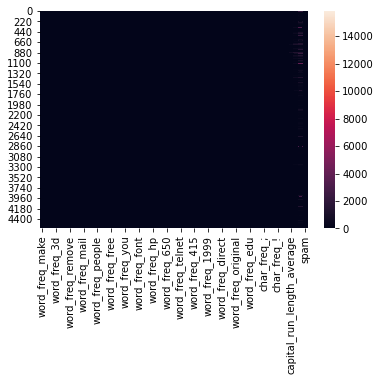

In [76]:
sns.heatmap(spam)   #no null values

In [77]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [78]:
# sns.countplot(spam['word_freq_order'],hue=spam['spam'])

In [79]:
#Too many parameters to do feature Engineering, let's train the SVM model directly and play with it's parameters.

In [80]:
X=spam.drop('spam',axis=1)

In [81]:
y=spam['spam'] #Our Target Column

In [82]:
#We can scale the X parameters
# scaling the features
# note that the scale function standardises each column, i.e.
# x = x-mean(x)/std(x)

In [83]:
from sklearn.preprocessing import scale

In [84]:
X = scale(X)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
from sklearn.svm import SVC

In [87]:
svm=SVC()

In [88]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
pred = svm.predict(X_test)

In [90]:
svm.score(X_test,y_test)

0.934825543120474

In [91]:
confusion_matrix(y_test,pred)

array([[853,  33],
       [ 66, 567]], dtype=int64)

In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       886
           1       0.94      0.90      0.92       633

    accuracy                           0.93      1519
   macro avg       0.94      0.93      0.93      1519
weighted avg       0.94      0.93      0.93      1519



In [93]:
#AWESOME!

In [94]:
#Let's compute a cross-validation score 

In [95]:
folds = KFold(n_splits = 5, shuffle= True, random_state = 4)

In [96]:
model = SVC()

In [97]:
cv_results = cross_val_score(model,X_train,y_train,cv=folds,scoring='accuracy')

In [98]:
print(cv_results)

[0.92706645 0.94165316 0.9237013  0.90909091 0.92532468]


In [99]:
print(cv_results.mean())

0.9253672988275905


In [100]:
#Playing around with other parametewrs of SVC

In [101]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [102]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.619, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.626, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.627, total=   0.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.623, total=   0.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.776, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.794, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.782, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.787, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
grid_predict = grid.predict(X_test)

In [ ]:
grid.score(X_test,y_test)

In [ ]:
#EVEN BETTER!